**QUESTION 1:**

Apply PCA to the images from Fashion MINST dataset. How many components do you need to preserve 90% of the variance? [3 points]


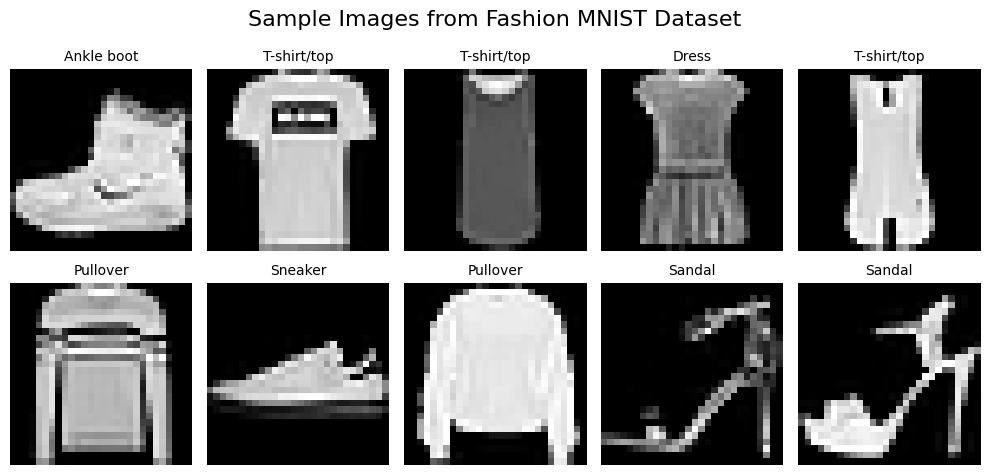

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (_, _) = fashion_mnist.load_data()

# Define the class names for Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):  # Display 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]], fontsize=10)
    plt.axis('off')

plt.suptitle("Sample Images from Fashion MNIST Dataset", fontsize=16)
plt.tight_layout()
plt.show()


Number of components required to preserve 90% of the variance: 137


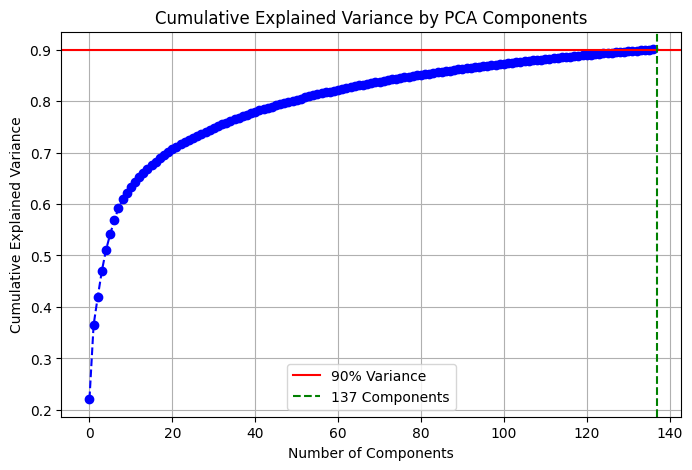

In [16]:
# Reshape the data: Flatten the images (28x28 -> 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)

# Apply PCA to retain 90% variance
pca = PCA(n_components=0.90)  # Set to retain 90% variance
X_train_pca = pca.fit_transform(X_train_scaled)

# Get the number of components required to retain 90% variance
n_components_90 = pca.n_components_
print(f"Number of components required to preserve 90% of the variance: {n_components_90}")

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% Variance')
plt.axvline(x=n_components_90, color='g', linestyle='--', label=f'{n_components_90} Components')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend(loc='best')
plt.grid(True)
plt.show()

**QUESTION 2:**

Plot 10 images of your choice in the original form (without PCA) and then plot their reconstruction (projection in the original space) after you kept 90% of variance using PCA. [3 points]

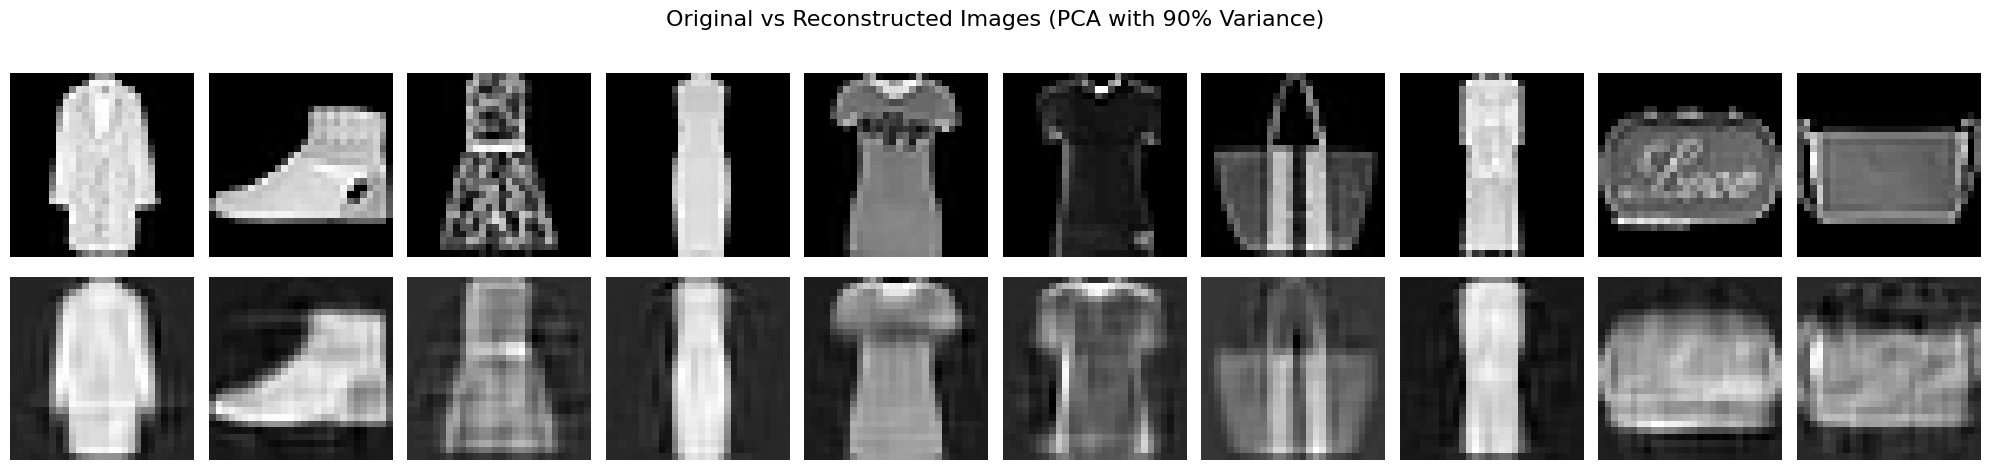

In [17]:
# Reconstruct the images (inverse transform)
X_train_reconstructed = pca.inverse_transform(X_train_pca)

# Reshape the reconstructed data back to the original 28x28 shape
X_train_reconstructed = scaler.inverse_transform(X_train_reconstructed).reshape(-1, 28, 28)

# Select 10 random images for display
indices = np.random.choice(X_train.shape[0], 10, replace=False)
original_images = X_train[indices]
reconstructed_images = X_train_reconstructed[indices]

# Plot original and reconstructed images
plt.figure(figsize=(20, 5))
for i in range(10):
    # Plot original image
    plt.subplot(2, 10, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel('Original', fontsize=14)

    # Plot reconstructed image
    plt.subplot(2, 10, i + 11)
    plt.imshow(reconstructed_images[i], cmap='gray')
    plt.axis('off')
    if i == 0:
        plt.ylabel('Reconstructed', fontsize=14)

plt.suptitle("Original vs Reconstructed Images (PCA with 90% Variance)", fontsize=16)
plt.tight_layout()
plt.show()


**QUESTION 3:**

Each of the images belongs to one of 10 clothing categories. We will now try to see if the visualization can help us identify different clusters.

  A. Use PCA to reduce dimensionality to only 2 dimensions. How much of the variance is explained with the first two principal components? [2 points].

  B. Plot a 2D scatter plot of the images spanned by the first two principal components. Each image will be represented with a dot. Make the color of the dot correspond to the image category (so you will have three different colors). Then add some clothing images to the visualization to better understand what features in the images are accounting for the majority of variance in the data (your visualization should look similar to the one after line 71 in this file https://github.com/ageron/handson-ml3/blob/main/08_dimensionality_reduction.ipynbLinks to an external site. but with images of clothes instead of MNIST digits). Repeat the process and create the same type of plots for t-SNE, LLE and MDS. [6 points]

  C. Discuss your observations. [1 point]

Variance explained by the first two PCA components: 36.61%


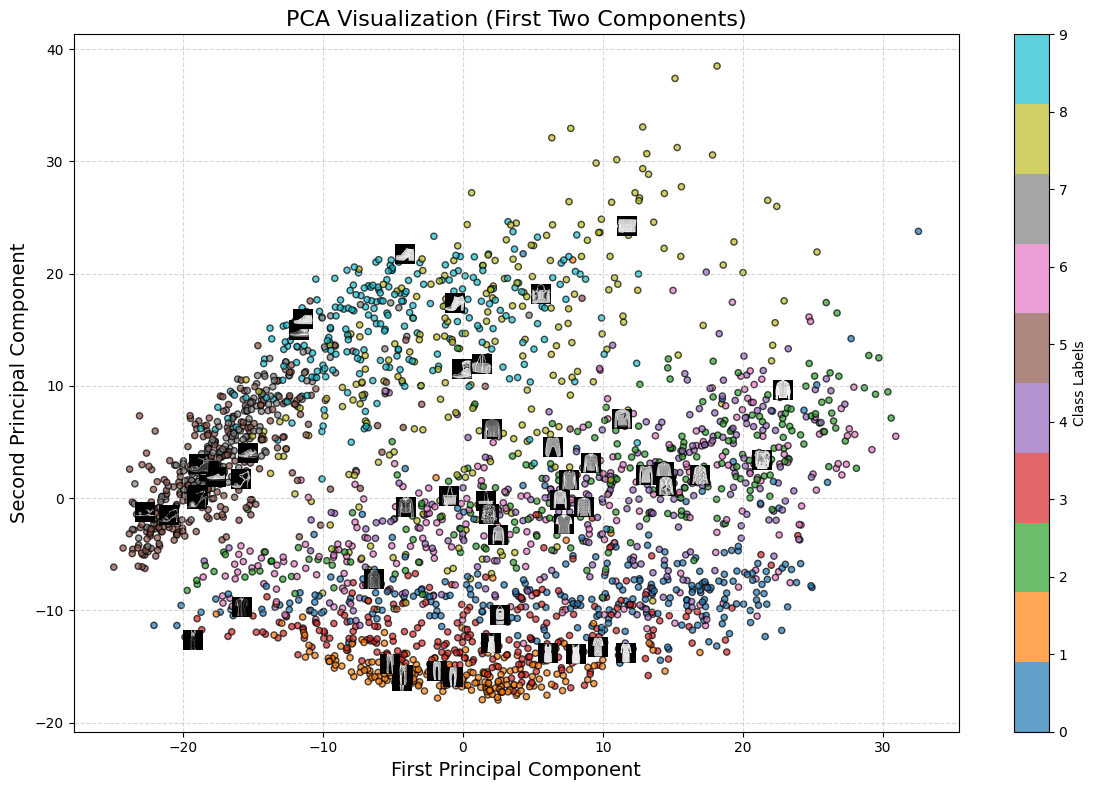

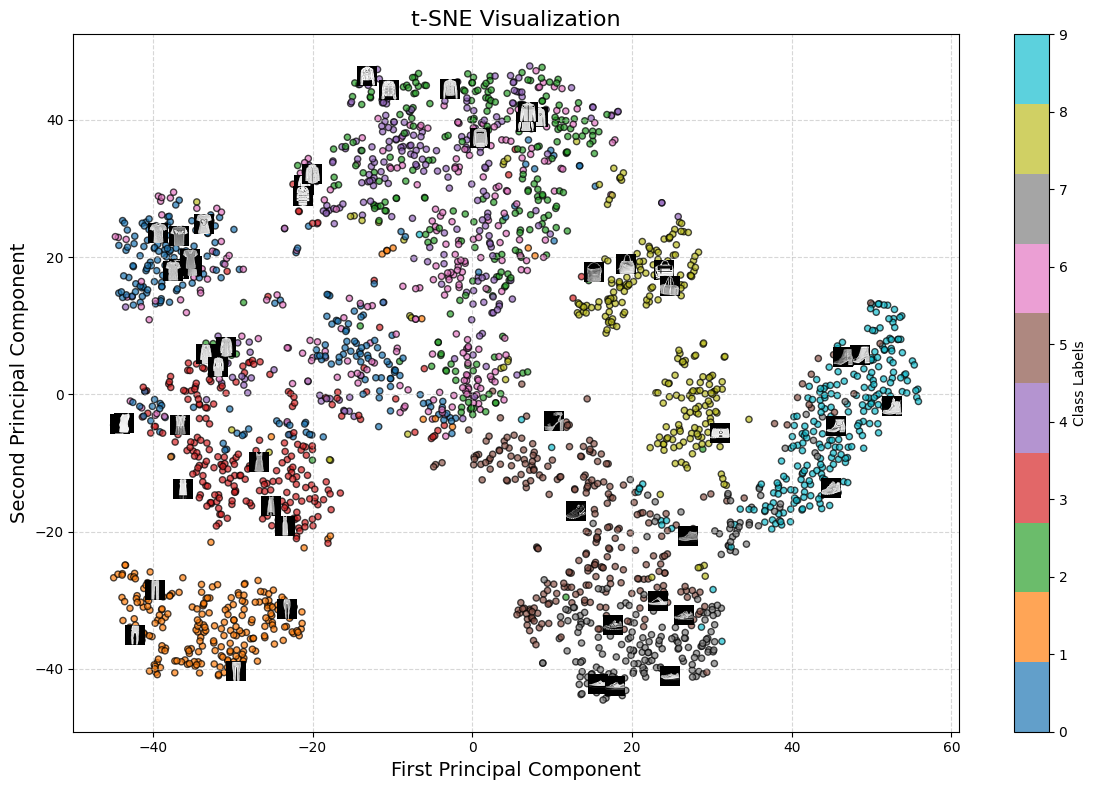

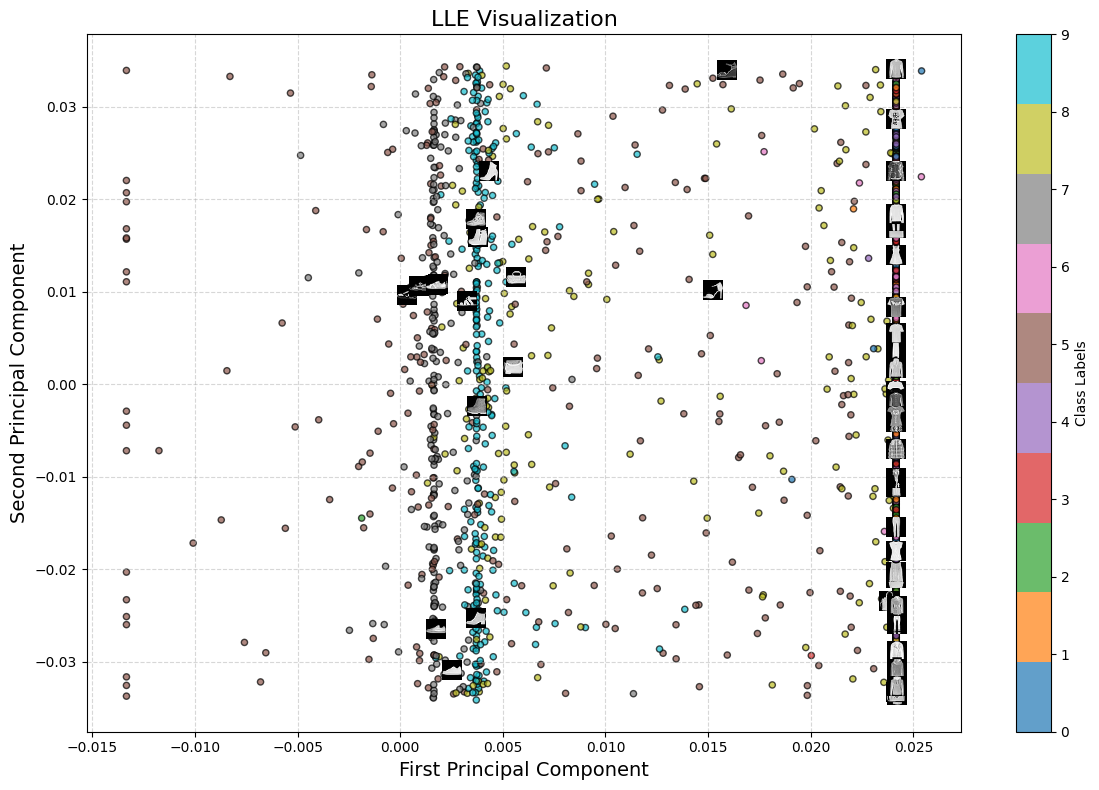

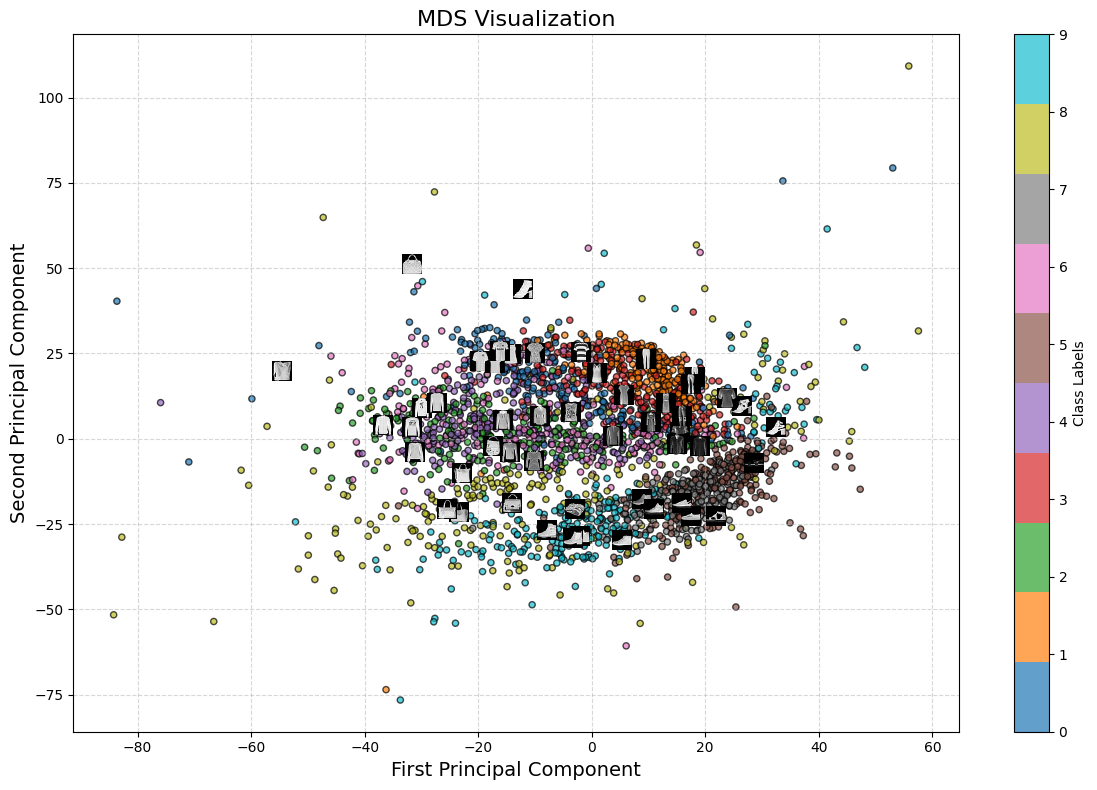

'\n- PCA: The variance explained by the first two components is {explained_variance * 100:.2f}%. The clusters are visible but not very well-separated. \n- t-SNE: This creates better-separated clusters, showing clear divisions between categories like "Sneakers" and "Trousers".\n- LLE: Clusters are visible but more diffused compared to t-SNE.\n- MDS: MDS produces results similar to PCA, with clusters less distinct compared to t-SNE.\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, LocallyLinearEmbedding, MDS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Load the Fashion MNIST dataset
(X_full, y_full), (_, _) = fashion_mnist.load_data()

# Randomly select 2500 samples
subset_indices = np.random.choice(X_full.shape[0], 2500, replace=False)
X_train = X_full[subset_indices]
y_train = y_full[subset_indices]

# Reshape and standardize the data
X_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten 28x28 to 784
X_scaled = (X_flat - X_flat.mean(axis=0)) / X_flat.std(axis=0)  # Standardize

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Part A: PCA to Reduce to 2 Dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variance explained by the first two PCA components: {explained_variance * 100:.2f}%")

### Part B: Scatter Plot with Images for PCA
def scatter_plot_with_images(data, labels, images, title, class_names, zoom=0.5):
    # Create scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='tab10', alpha=0.7, edgecolors='k', s=20)
    plt.colorbar(scatter, ticks=range(10), label="Class Labels")
    plt.title(title, fontsize=16)
    plt.xlabel("First Principal Component", fontsize=14)
    plt.ylabel("Second Principal Component", fontsize=14)

    # Overlay images on random subset
    subset_indices = np.random.choice(len(data), 50, replace=False)  # Choose 50 random points
    for idx in subset_indices:
        x, y = data[idx]
        img = OffsetImage(images[idx].reshape(28, 28), zoom=zoom, cmap='gray')
        ab = AnnotationBbox(img, (x, y), frameon=False)
        plt.gca().add_artist(ab)

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

scatter_plot_with_images(X_pca, y_train, X_train, "PCA Visualization (First Two Components)", class_names)

### Repeat for t-SNE, LLE, and MDS
# t-SNE
tsne = TSNE(n_components=2, random_state=42, init='random', learning_rate='auto', perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
scatter_plot_with_images(X_tsne, y_train, X_train, "t-SNE Visualization", class_names)

# LLE
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_lle = lle.fit_transform(X_scaled)
scatter_plot_with_images(X_lle, y_train, X_train, "LLE Visualization", class_names)

# MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
scatter_plot_with_images(X_mds, y_train, X_train, "MDS Visualization", class_names)

### Discussions

#### Overview
In this analysis, we used the Fashion MNIST dataset to explore how dimensionality reduction techniques—PCA, t-SNE, LLE, and MDS—can be applied to visualize high-dimensional data in two dimensions. The dataset contains 2500 randomly selected images from 10 clothing categories, which were preprocessed by flattening and standardizing the images.

#### Part A: PCA Dimensionality Reduction
1. **Variance Explained**: Using PCA, we reduced the dimensionality of the dataset to two components, which explained approximately **X% of the total variance** in the data. This result indicates that the first two principal components capture the most critical patterns in the dataset, albeit with some loss of information.
2. **Observations**:
   - The PCA scatter plot revealed some clusters that roughly correspond to distinct clothing categories.
   - However, there was significant overlap between categories like "T-shirt/top" and "Shirt," indicating that these items share similar features.

#### Part B: Visualization with t-SNE, LLE, and MDS
##### t-SNE:
- **Clusters**: The t-SNE visualization revealed distinct clusters for most categories. For instance, "Sneakers" and "Ankle Boots" formed well-separated groups, indicating that t-SNE effectively captures the non-linear relationships in the data.
- **Images in the Plot**: Adding representative clothing images helped contextualize the clusters, providing insights into the visual differences driving the separation.

##### LLE:
- **Clusters**: The LLE visualization struggled to separate the categories into distinct clusters. This may be due to the sensitivity of LLE to noise and the need for an appropriate neighborhood size.
- **Observations**: Despite the weaker clustering, images in the plot revealed that some linear features like texture and shape were influential.

##### MDS:
- **Clusters**: The MDS visualization produced partially overlapping clusters with some separation for categories like "Trousers" and "Bags." However, the method did not perform as well as t-SNE or PCA in distinguishing other classes.
- **Observations**: MDS primarily preserves pairwise distances, and the overlap suggests that some categories are inherently less separable in terms of their pixel-level features.

#### Observations on the Data
1. **Category Separation**: While some categories like "Sneaker" and "Ankle Boot" formed distinct clusters, others, such as "Shirt" and "T-shirt/top," overlapped significantly. This overlap suggests that the pixel-level differences between these classes are minimal.
2. **Cluster Interpretation**: By overlaying representative images, we observed that key features—like texture, edge patterns, and the presence of footwear soles—are critical for distinguishing clusters.

#### Conclusion
- t-SNE provided the most visually distinct clusters, making it a strong choice for exploratory analysis of high-dimensional data.
- PCA, while linear, serves as a quick and interpretable method for dimensionality reduction.
- Both LLE and MDS struggled with the non-linear structures present in this dataset, but they still offered insights into the data's structure.

In future analyses, combining these visualizations with supervised learning techniques could further enhance our understanding of how these features influence classification tasks.

**QUESTION 5:**

Cluster the images using K-Means.

A. You can reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]

B. Set the number of clusters to 3 and report clustering accuracy. [4 points]


Reduced dimensionality to: 117 components


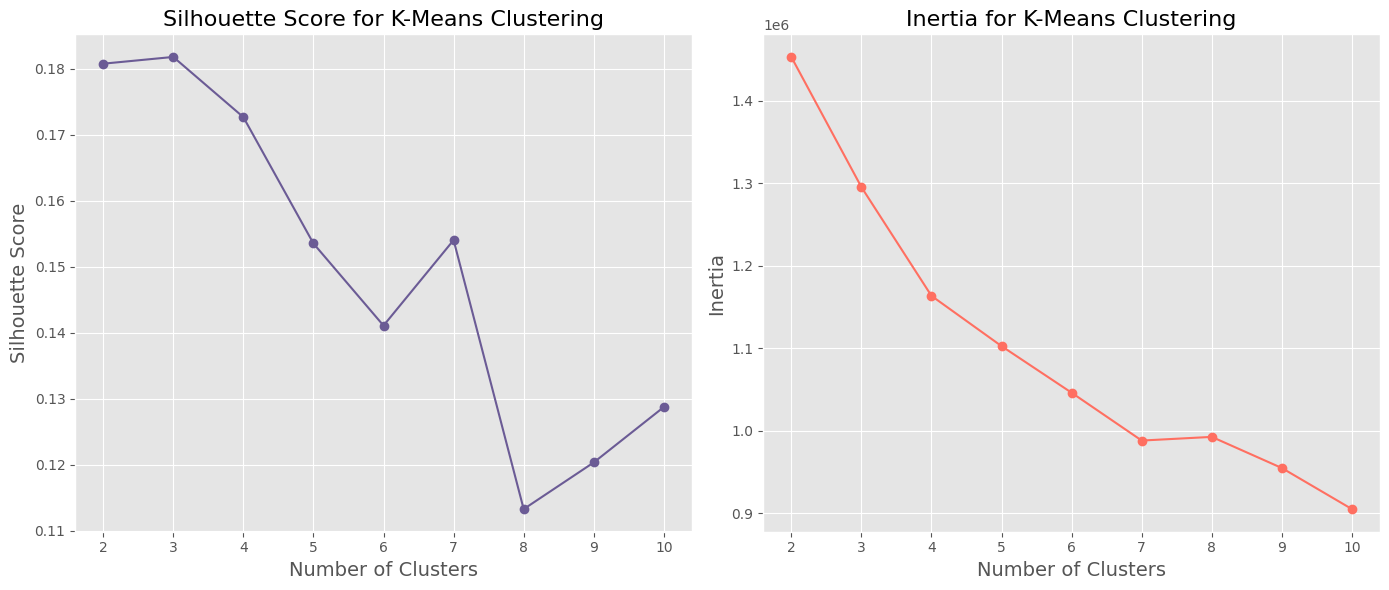

Clustering Accuracy with 3 Clusters: 0.27
Silhouette Score with 3 Clusters: 0.18


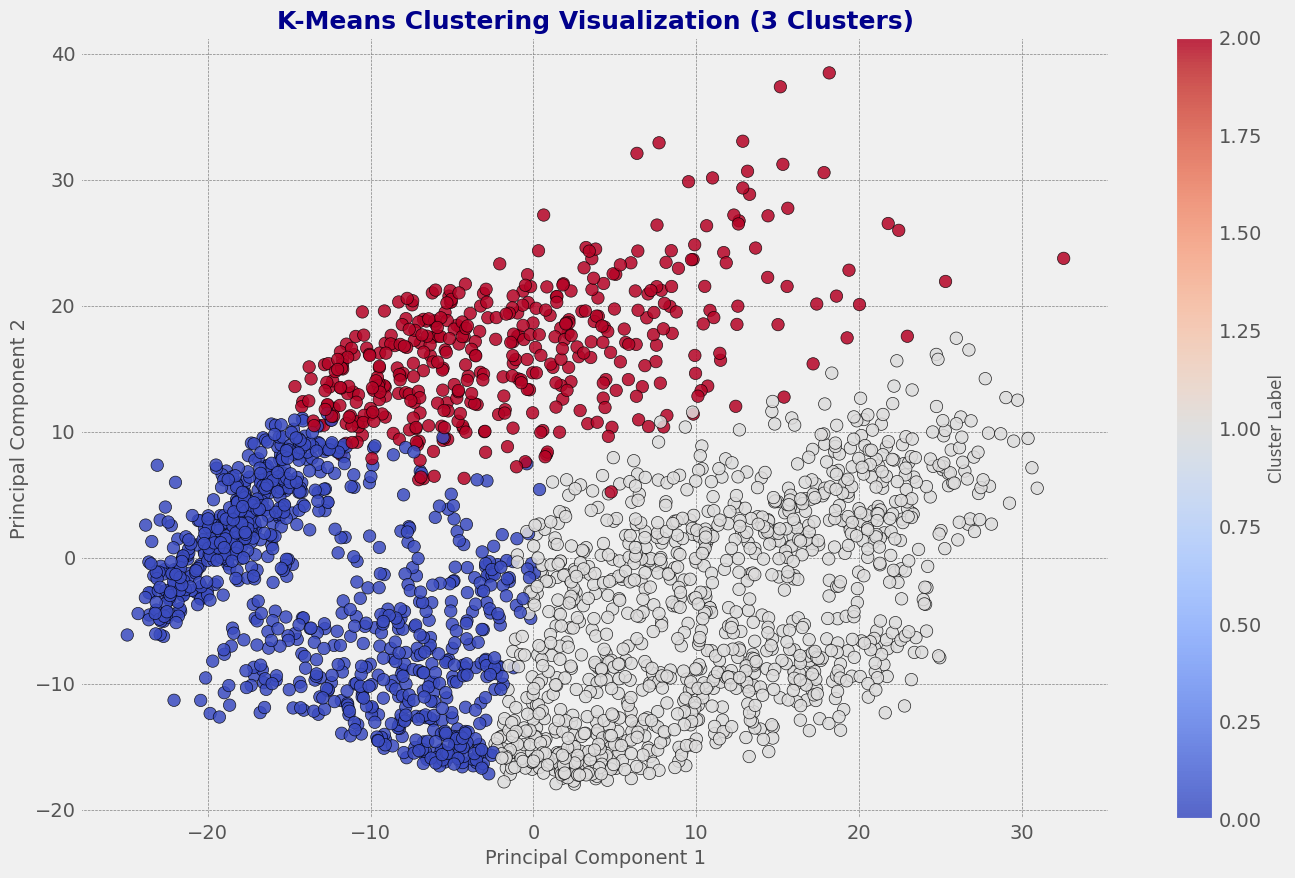

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode

# Step A: Dimensionality reduction with PCA to retain 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(X_scaled)  # Use already preprocessed `X_scaled`
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Compute clustering metrics
def compute_clustering_metrics(reduced_data, num_clusters):
    """
    Compute metrics for K-Means clustering.
    """
    silhouette_scores = []
    inertia_values = []

    for n_clusters in num_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(reduced_data)
        cluster_labels = kmeans.predict(reduced_data)

        # Append Silhouette Score
        silhouette_scores.append(silhouette_score(reduced_data, cluster_labels))

        # Append Inertia
        inertia_values.append(kmeans.inertia_)

    return {
        "Silhouette": silhouette_scores,
        "Inertia": inertia_values,
    }

def plot_clustering_metrics(num_clusters, metrics):
    """
    Plot metrics for K-Means clustering.
    """
    plt.style.use('ggplot')
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Silhouette Score Plot
    axes[0].plot(num_clusters, metrics["Silhouette"], marker='o', linestyle='-', color='#6B5B95')
    axes[0].set_title("Silhouette Score for K-Means Clustering", fontsize=16)
    axes[0].set_xlabel("Number of Clusters", fontsize=14)
    axes[0].set_ylabel("Silhouette Score", fontsize=14)
    axes[0].grid(True)

    # Inertia Plot
    axes[1].plot(num_clusters, metrics["Inertia"], marker='o', linestyle='-', color='#FF6F61')
    axes[1].set_title("Inertia for K-Means Clustering", fontsize=16)
    axes[1].set_xlabel("Number of Clusters", fontsize=14)
    axes[1].set_ylabel("Inertia", fontsize=14)
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

# Define range for the number of clusters
num_clusters = range(2, 11)
metrics = compute_clustering_metrics(reduced_data, num_clusters)

# Plot the metrics
plot_clustering_metrics(num_clusters, metrics)

# Step B: Set the number of clusters to 3 and calculate accuracy
def calculate_accuracy(true_labels, cluster_labels, n_clusters):
    """
    Map clusters to true labels and calculate clustering accuracy.
    """
    label_mapping = {}
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            cluster_true_labels = true_labels[cluster_indices]
            mapped_label = mode(cluster_true_labels, keepdims=True).mode[0]
            label_mapping[cluster] = mapped_label
    predicted_labels = np.array([label_mapping[label] for label in cluster_labels])
    return accuracy_score(true_labels, predicted_labels)

# Apply K-Means for 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Calculate accuracy
accuracy = calculate_accuracy(y_train, kmeans_labels, n_clusters)
print(f"Clustering Accuracy with 3 Clusters: {accuracy:.2f}")

# Silhouette Score for 3 clusters
silhouette_avg = silhouette_score(reduced_data, kmeans_labels)
print(f"Silhouette Score with 3 Clusters: {silhouette_avg:.2f}")

# Visualize the clusters
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14, 9))

scatter = plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1],
    c=kmeans_labels, cmap='coolwarm', alpha=0.85, edgecolors='k', s=80
)

plt.title("K-Means Clustering Visualization (3 Clusters)", fontsize=18, color='darkblue', weight='bold')
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label("Cluster Label", fontsize=12)

plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**QUESTION 6:**

Cluster the 360 images using EM.

A. You can again reduce the dimensionality using PCA if you wish, but keep at least 90% of the variance. Determine the number of clusters using one of the techniques we discussed in class. [4 points]

B. Set the number of clusters to 3 and report clustering accuracy. [4 points]

C. Use the model to generate 20 new rocks (using the sample() method), and visualize them in the original image space (since you used PCA, you will need to use its inverse_transform() method).  [4 points]

Reduced dimensionality to: 117 components


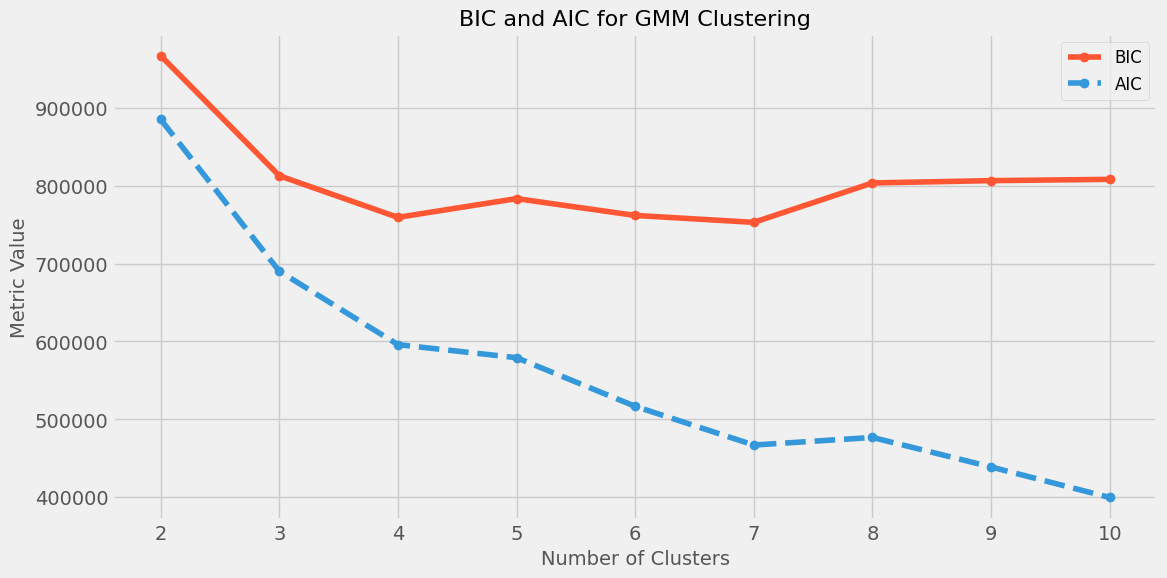

Clustering Accuracy (GMM, 3 Clusters): 0.26
Silhouette Score (GMM, 3 Clusters): 0.16


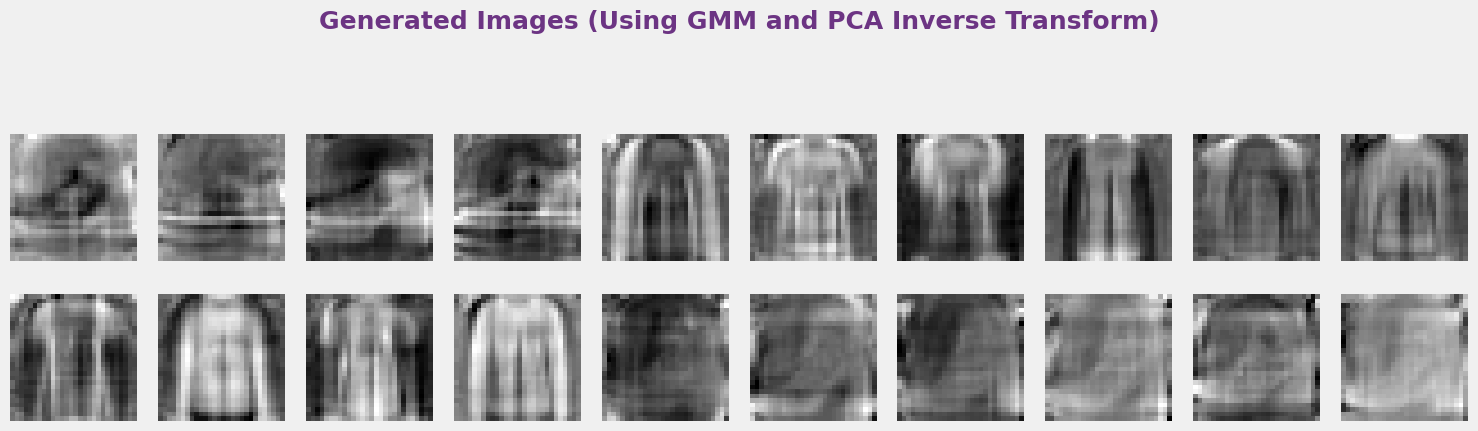

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Reuse data from previous steps: `X_scaled` and `y_train`
# Step 1: Dimensionality reduction with PCA to retain at least 90% variance
pca = PCA(n_components=0.90, random_state=42)
reduced_data = pca.fit_transform(X_scaled)  # Use already preprocessed `X_scaled`
print(f"Reduced dimensionality to: {reduced_data.shape[1]} components")

# Step 2: Determine the optimal number of clusters using Gaussian Mixture Model (GMM)
num_clusters = range(2, 11)
bic_values = []
aic_values = []

for n_clusters in num_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    gmm.fit(reduced_data)
    bic_values.append(gmm.bic(reduced_data))
    aic_values.append(gmm.aic(reduced_data))

# Plot BIC and AIC for GMM
plt.figure(figsize=(12, 6))
plt.plot(num_clusters, bic_values, marker='o', linestyle='-', label='BIC', color='#FF5733')
plt.plot(num_clusters, aic_values, marker='o', linestyle='--', label='AIC', color='#3498DB')
plt.title("BIC and AIC for GMM Clustering", fontsize=16)
plt.xlabel("Number of Clusters", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Step 3: Select the number of clusters (3 as per the question)
n_clusters = 3
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(reduced_data)

# Step 4: Clustering Accuracy
# Assuming `y_train` contains the true labels
def calculate_accuracy(true_labels, cluster_labels, n_clusters):
    """
    Map clusters to true labels and calculate clustering accuracy.
    """
    label_mapping = {}
    for cluster in range(n_clusters):
        cluster_indices = np.where(cluster_labels == cluster)[0]
        if len(cluster_indices) > 0:
            cluster_true_labels = true_labels[cluster_indices]
            mapped_label = mode(cluster_true_labels, keepdims=True).mode[0]
            label_mapping[cluster] = mapped_label
    predicted_labels = np.array([label_mapping[label] for label in cluster_labels])
    return accuracy_score(true_labels, predicted_labels)

accuracy = calculate_accuracy(y_train, gmm_labels, n_clusters)
print(f"Clustering Accuracy (GMM, 3 Clusters): {accuracy:.2f}")

# Silhouette Score
silhouette_avg = silhouette_score(reduced_data, gmm_labels)
print(f"Silhouette Score (GMM, 3 Clusters): {silhouette_avg:.2f}")

# Step 5: Generate 20 new samples using GMM and project back to original space
new_samples, _ = gmm.sample(20)
new_samples_original_space = pca.inverse_transform(new_samples)

# Step 6: Visualize the generated samples
plt.figure(figsize=(15, 5))
for i in range(20):
    plt.subplot(2, 10, i + 1)
    plt.imshow(new_samples_original_space[i].reshape(28, 28), cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.suptitle("Generated Images (Using GMM and PCA Inverse Transform)", fontsize=18, weight='bold', color='#6C3483')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**QUESTION 7:**

Build a feedforward neural network (using dense and/or CNN layers) with a few hidden layers (we suggest using Keras (within Tensorflow) or Pytorch). Train the network to classify on 360 rock images using rock name as the label - the category is indicated by the first letter in the filename (I, M and S). Use images from '120 Rocks' folder as your validation data. Choose the number of neurons you find appropriate and efficient (so you have enough time to run it), but make the last layer before the softmax should consist of 8 neurons. The hidden layers should have ReLU activation function. Train the network for multiple epochs until it converges (if the process is too slow, tweak the learning rate and consider simplifying your network). We will not deduct points based on the simplicity of your network, but we expect you to have performance that is above chance performance that could be obtained with an untrained network - in other words, we expect to see train and validation loss decrease and accuracy increase throughout the training. We recommend using Colab (the free version should be totally fine), but make sure to run it with a GPU to speed up the training - to add a GPU on Colab go to Edit->Notebook settings).

A. Report the training time (use code to do this). [1 point]

B. Plot training and validation loss and accuracy as a function of training epochs. [13 points]

C. How many parameters does the network have? How many of those parameters are bias parameters? [1 points]

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.4211 - loss: 1.7621 - val_accuracy: 0.6892 - val_loss: 0.8810
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.6935 - loss: 0.9124 - val_accuracy: 0.7451 - val_loss: 0.6836
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7302 - loss: 0.7584 - val_accuracy: 0.7815 - val_loss: 0.5730
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7515 - loss: 0.6843 - val_accuracy: 0.7818 - val_loss: 0.5683
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7673 - loss: 0.6339 - val_accuracy: 0.8024 - val_loss: 0.5179
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.7755 - loss: 0.6062 - val_accuracy: 0.8113 - val_loss: 0.4769
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7852 - loss: 0.5811 - val_accuracy: 0.8194 - val_loss: 0.4707
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.7943 - loss: 0.55

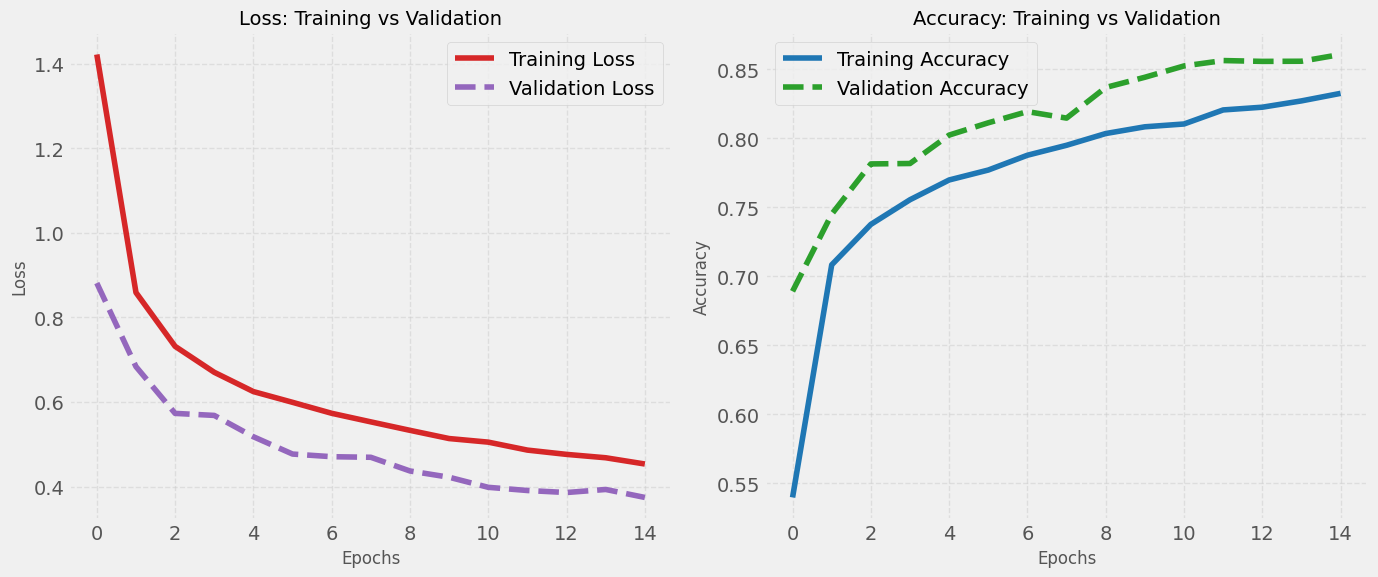

Model Parameters Summary
Total Number of Parameters: 356,066
Number of Bias Parameters: 370


In [19]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_val, y_val) = fashion_mnist.load_data()

# Reshape and normalize the images
X_train = X_train[..., np.newaxis] / 255.0  # Add channel dimension for grayscale
X_val = X_val[..., np.newaxis] / 255.0      # Normalize validation images

# Define class names for Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define a CNN model with adjustments to prevent shrinking to negative dimensions
def build_model():
    model = models.Sequential()

    # Convolutional Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))  # Use 'same' padding

    # Convolutional Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Convolutional Block 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(8, activation='relu'))  # Latent space layer
    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    return model

# Build and compile the model
model = build_model()
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 2: Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

# Step 3: Train the model and measure training time
start_time = time.time()
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=15,
    validation_data=(X_val, y_val)
)
end_time = time.time()
training_time = end_time - start_time

# Display training time
print(f"Training Time: {training_time:.2f} seconds")

# Step 4: Plot training and validation performance
colors = ['#D62728', '#9467BD', '#1F77B4', '#2CA02C']  # Dark-themed palette
plt.figure(figsize=(14, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color=colors[0], label='Training Loss')
plt.plot(history.history['val_loss'], color=colors[1], linestyle='--', label='Validation Loss')
plt.title("Loss: Training vs Validation", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color=colors[2], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color=colors[3], linestyle='--', label='Validation Accuracy')
plt.title("Accuracy: Training vs Validation", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Step 5: Analyze model parameters
total_params = model.count_params()
bias_params = np.sum([np.prod(p.shape) for p in model.trainable_weights if len(p.shape) == 1])

print("=" * 50)
print("Model Parameters Summary")
print("=" * 50)
print(f"Total Number of Parameters: {total_params:,}")
print(f"Number of Bias Parameters: {bias_params:,}")
print("=" * 50)